In [ ]:
import os
import shutil
import random
from osgeo import gdal

In [ ]:
import zipfile
import os
import random

# Path to your zip file
zip_path = "/content/CivilELdata.zip"

# Folder where you want to extract
extract_folder = "/content/CivilELdata/"

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Set the path to the extracted folder
path = "/content/CivilELdata/CivilELdata/data"

# Set the random seed
SEED = random.seed(123)


In [ ]:
# get names of categories
categories = ['Forest', 'HerbaceousVegetation', 'Pasture', 'River', 'SeaLake',
              'beach', 'desert', 'ice', 'mountain', 'ocean']

tif_files = []
for (dirpath, dirnames, filenames) in os.walk(path + 'land-use-tif/'):
    categories.extend(dirnames)
    tif_files += filenames
#tif_files.remove('.DS_Store')

In [ ]:
#FINAL
import os
import shutil
import random

# Define base and output paths
base_path = 'CivilELdata/CivilELdata/data/'
output_path = 'CivilELdata/CivilELdata/land-use-jpeg/'

# Get categories (subdirectories)
categories = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]

# Create train, valid, test directories with category subfolders
splits = ['train', 'valid', 'test']
for split in splits:
    for category in categories:
        split_cat_path = os.path.join(output_path, split, category)
        os.makedirs(split_cat_path, exist_ok=True)

# For each category, collect and split image files
for category in categories:
    src_dir = os.path.join(base_path, category)
    files = [f for f in os.listdir(src_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    random.shuffle(files)
    total = len(files)
    split1 = int(0.8 * total)
    split2 = int(0.9 * total)

    train_files = files[:split1]
    valid_files = files[split1:split2]
    test_files = files[split2:]

    # Copy files to respective folders
    for f in train_files:
        shutil.copy(os.path.join(src_dir, f), os.path.join(output_path, 'train', category, f))
    for f in valid_files:
        shutil.copy(os.path.join(src_dir, f), os.path.join(output_path, 'valid', category, f))
    for f in test_files:
        shutil.copy(os.path.join(src_dir, f), os.path.join(output_path, 'test', category, f))

print("Dataset split completed. Check the 'land-use-jpeg' folder.")


Dataset split completed. Check the 'land-use-jpeg' folder.


In [ ]:
! pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 78.8 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import rasterio
from rasterio.plot import show, show_hist
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="white")

In [ ]:
path = "/content/CivilELdata/CivilELdata/data"

In [ ]:
# get names of label folders
categories = ['Forest', 'HerbaceousVegetation', 'Pasture', 'River', 'SeaLake',
              'beach', 'desert', 'ice', 'mountain', 'ocean']
for (dirpath, dirnames, filenames) in os.walk(path + 'land-use-tif/'):
    categories.extend(dirnames)

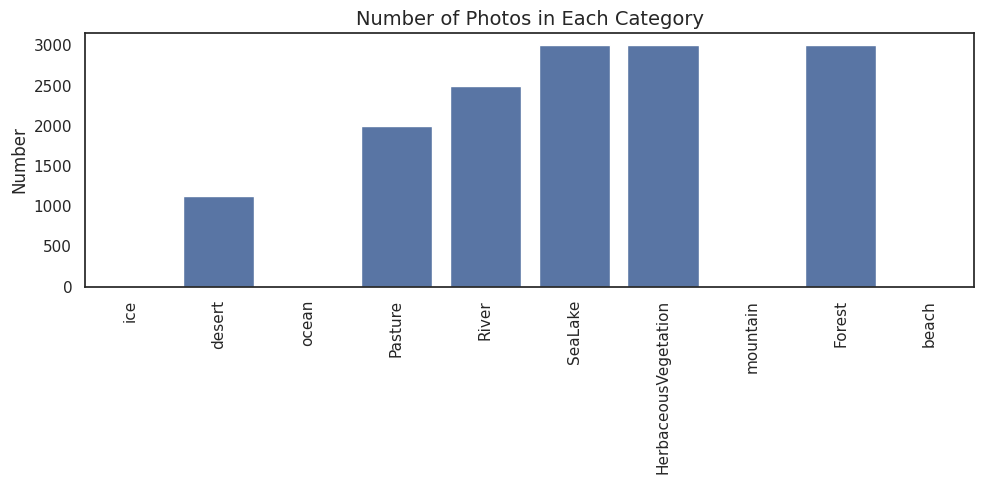

In [ ]:
#FINAL
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Updated path to match your actual data directory
path = 'CivilELdata/CivilELdata/data/'

# Get list of categories (folders)
categories = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]

# Count number of images in each category
total = 0
len_categories = {}
for category in categories:
    cat_path = os.path.join(path, category)
    len_files = len([f for f in os.listdir(cat_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
    total += len_files
    len_categories[category] = len_files

# Plotting
x = list(range(len(len_categories)))
y = list(len_categories.values())

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=x, y=y)
plt.title("Number of Photos in Each Category", fontsize=14)
plt.ylabel("Number")
plt.xticks(ticks=x, labels=list(len_categories.keys()), rotation=90)
plt.tight_layout()
plt.show()


Image not found: CivilELdata/CivilELdata/land-use-jpeg/train/River/River_100.jpg


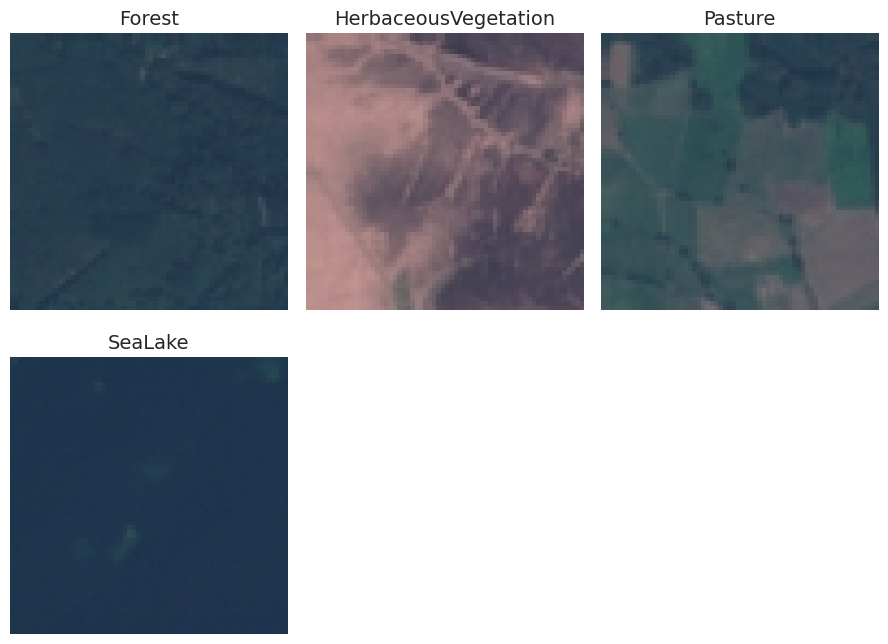

In [ ]:
import os
import matplotlib.pyplot as plt

# Correct base path
base_path = 'CivilELdata/CivilELdata/land-use-jpeg/train/'

# List of selected image paths
images = [
    os.path.join(base_path, 'Forest/Forest_1.jpg'),
    os.path.join(base_path, 'HerbaceousVegetation/HerbaceousVegetation_1.jpg'),
    os.path.join(base_path, 'Pasture/Pasture_1.jpg'),
    os.path.join(base_path, 'River/River_100.jpg'),
    os.path.join(base_path, 'SeaLake/SeaLake_10.jpg')
]

plt.figure(figsize=(12, 10))
for i, img_path in enumerate(images, start=1):
    if os.path.exists(img_path):
        category = os.path.basename(os.path.dirname(img_path))  # Safely get folder name
        plt.subplot(3, 4, i)
        img = plt.imread(img_path)
        plt.imshow(img)
        plt.axis('off')
        plt.title(category, fontsize=14)
    else:
        print(f"Image not found: {img_path}")

plt.tight_layout()
plt.show()


In [ ]:
fp = '/content/CivilELdata/CivilELdata/land-use-jpeg/train/River/River_1000.jpg'
raster = rasterio.open(fp)

print('Height:', raster.height)
print('Width:', raster.width)
print('Number of bands:', raster.count)

Height: 64
Width: 64
Number of bands: 3


/usr/local/lib/python3.11/dist-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


Text(0.5, 1.0, 'Blue')

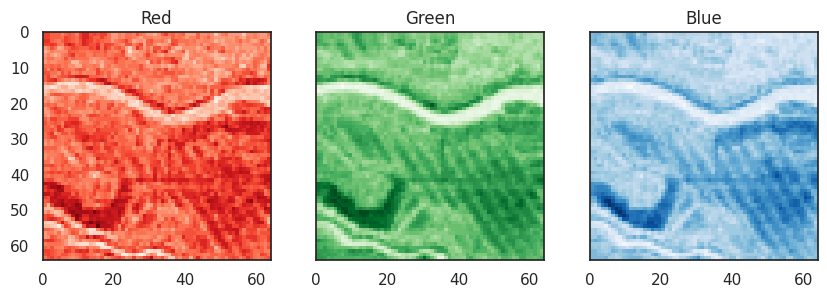

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, figsize=(10, 4), sharey=True)

# Plot Red, Green and Blue (rgb)
show((raster, 3), cmap='Reds', ax=ax1)
show((raster, 2), cmap='Greens', ax=ax2)
show((raster, 1), cmap='Blues', ax=ax3)

# Add titles
ax1.set_title("Red")
ax2.set_title("Green")
ax3.set_title("Blue")

In [ ]:
# from https://automating-gis-processes.github.io/CSC/notebooks/L5/plotting-raster.html

red = raster.read(1)
green = raster.read(2)
blue = raster.read(3)

# Function to normalize the grid values
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

# Normalize the bands
redn = normalize(red)
greenn = normalize(green)
bluen = normalize(blue)

print("Normalized bands")
print(redn.min(), '-', redn.max(), 'mean:', redn.mean())
print(greenn.min(), '-', greenn.max(), 'mean:', greenn.mean())
print(bluen.min(), '-', bluen.max(), 'mean:', bluen.mean())

Normalized bands
0.0 - 1.0 mean: 0.40420050370065785
0.0 - 1.0 mean: 0.5332352487664473
0.0 - 1.0 mean: 0.5094896399456521


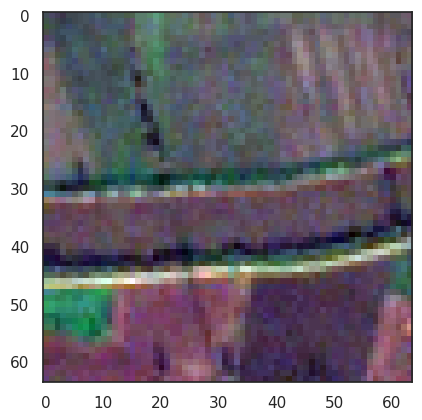

In [ ]:
# Create RGB natural color composite
rgb = np.dstack((redn, greenn, bluen))

# Let's see how our color composite looks like
plt.imshow(rgb)

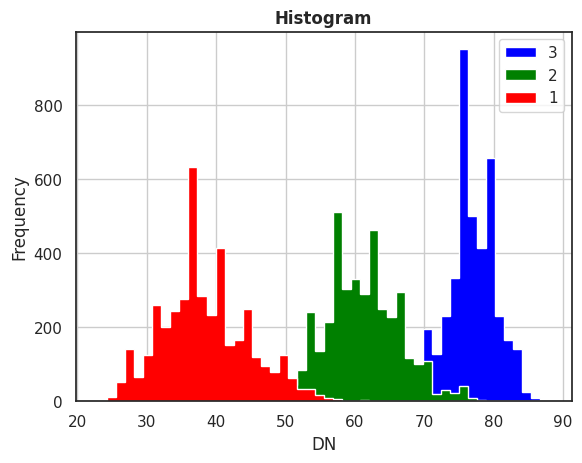

In [ ]:
# see how the wavelengths of different bands are distributed
show_hist(raster, bins=50, lw=0.0, stacked=False,
      histtype='stepfilled', title="Histogram")

# CNN PART

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os
import shutil
import itertools
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import models
from tensorflow.keras import backend as K
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix

%matplotlib inline


In [ ]:
import os
import numpy as np
import random
import tensorflow as tf

# Ensure reproducibility
os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(123)         # ✅ do not assign with "="
random.seed(456)
tf.random.set_seed(789)


In [ ]:
base_path = '/content/CivilELdata/CivilELdata/'
train_path = os.path.join(base_path, 'land-use-jpeg/train')
valid_path = os.path.join(base_path, 'land-use-jpeg/valid')
test_path = os.path.join(base_path, 'land-use-jpeg/test')

In [ ]:
categories = ['Forest', 'HerbaceousVegetation', 'Pasture', 'River', 'SeaLake',
              'beach', 'desert', 'ice', 'mountain', 'ocean']
for (dirpath, dirnames, filenames) in os.walk(os.path.join(base_path, 'land-use-tif')):
    categories.extend(dirnames)

In [ ]:
for category in categories:
    tr = os.path.join(train_path, category)
    len_tr = len(os.listdir(tr))

    val = os.path.join(valid_path, category)
    len_val = len(os.listdir(val))

    test = os.path.join(test_path, category)
    len_test = len(os.listdir(val))

    print('Train images for ' + category + ': {}'.format(len_tr))
    print('Validation images for ' + category + ': {}'.format(len_val))
    print('Test images for ' + category + ': {}'.format(len_test))
    print('')

Train images for Forest: 2400
Validation images for Forest: 300
Test images for Forest: 300

Train images for HerbaceousVegetation: 2400
Validation images for HerbaceousVegetation: 300
Test images for HerbaceousVegetation: 300

Train images for Pasture: 1600
Validation images for Pasture: 200
Test images for Pasture: 200

Train images for River: 2000
Validation images for River: 250
Test images for River: 250

Train images for SeaLake: 2400
Validation images for SeaLake: 300
Test images for SeaLake: 300

Train images for beach: 7
Validation images for beach: 1
Test images for beach: 1

Train images for desert: 904
Validation images for desert: 113
Test images for desert: 113

Train images for ice: 3
Validation images for ice: 0
Test images for ice: 0

Train images for mountain: 11
Validation images for mountain: 1
Test images for mountain: 1

Train images for ocean: 5
Validation images for ocean: 1
Test images for ocean: 1



In [ ]:
#better accuracy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation + normalization for training
train_datagen = ImageDataGenerator(
    rescale=1./255,              # Normalize pixel values (0–255 → 0–1)
    rotation_range=20,           # Random rotation
    width_shift_range=0.1,       # Horizontal shift
    height_shift_range=0.1,      # Vertical shift
    zoom_range=0.2,              # Random zoom
    horizontal_flip=True,        # Random horizontal flip
    shear_range=0.1              # Shearing transformation
)

# Only normalization for validation and test sets
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow generators
train_batches = train_datagen.flow_from_directory(
    train_path,
    target_size=(64, 64),
    classes=categories,
    batch_size=20
)

valid_batches = valid_datagen.flow_from_directory(
    valid_path,
    target_size=(64, 64),
    classes=categories,
    batch_size=10
)

test_batches = test_datagen.flow_from_directory(
    test_path,
    target_size=(64, 64),
    classes=categories,
    batch_size=10,
    shuffle=False  # Needed to match predictions to filenames
)


Found 11730 images belonging to 10 classes.
Found 1466 images belonging to 10 classes.
Found 1469 images belonging to 10 classes.


In [ ]:
#New code
def plots(ims, figsize=(30, 15), rows=1, interp=False, titles=None):
    if isinstance(ims[0], np.ndarray):
        ims = (np.array(ims) * 255).astype(np.uint8)  # <- SCALE BACK to 0–255
        if ims.shape[-1] != 3:
            ims = ims.transpose((0, 2, 3, 1))
    f = plt.figure(figsize=figsize)
    cols = len(ims) // rows if len(ims) % rows == 0 else len(ims) // rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i + 1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(str(titles[i]), fontsize=12)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
    plt.tight_layout()
    plt.show()


In [ ]:
# plots images with labels within jupyter notebook
# from Github / YouTube user deeplizard: https://www.youtube.com/watch?v=LhEMXbjGV_4
def plots(ims, figsize=(30, 15), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if(ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims) //rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.tight_layout()
        plt.imshow(ims[i], interpolation=None if interp else 'none')

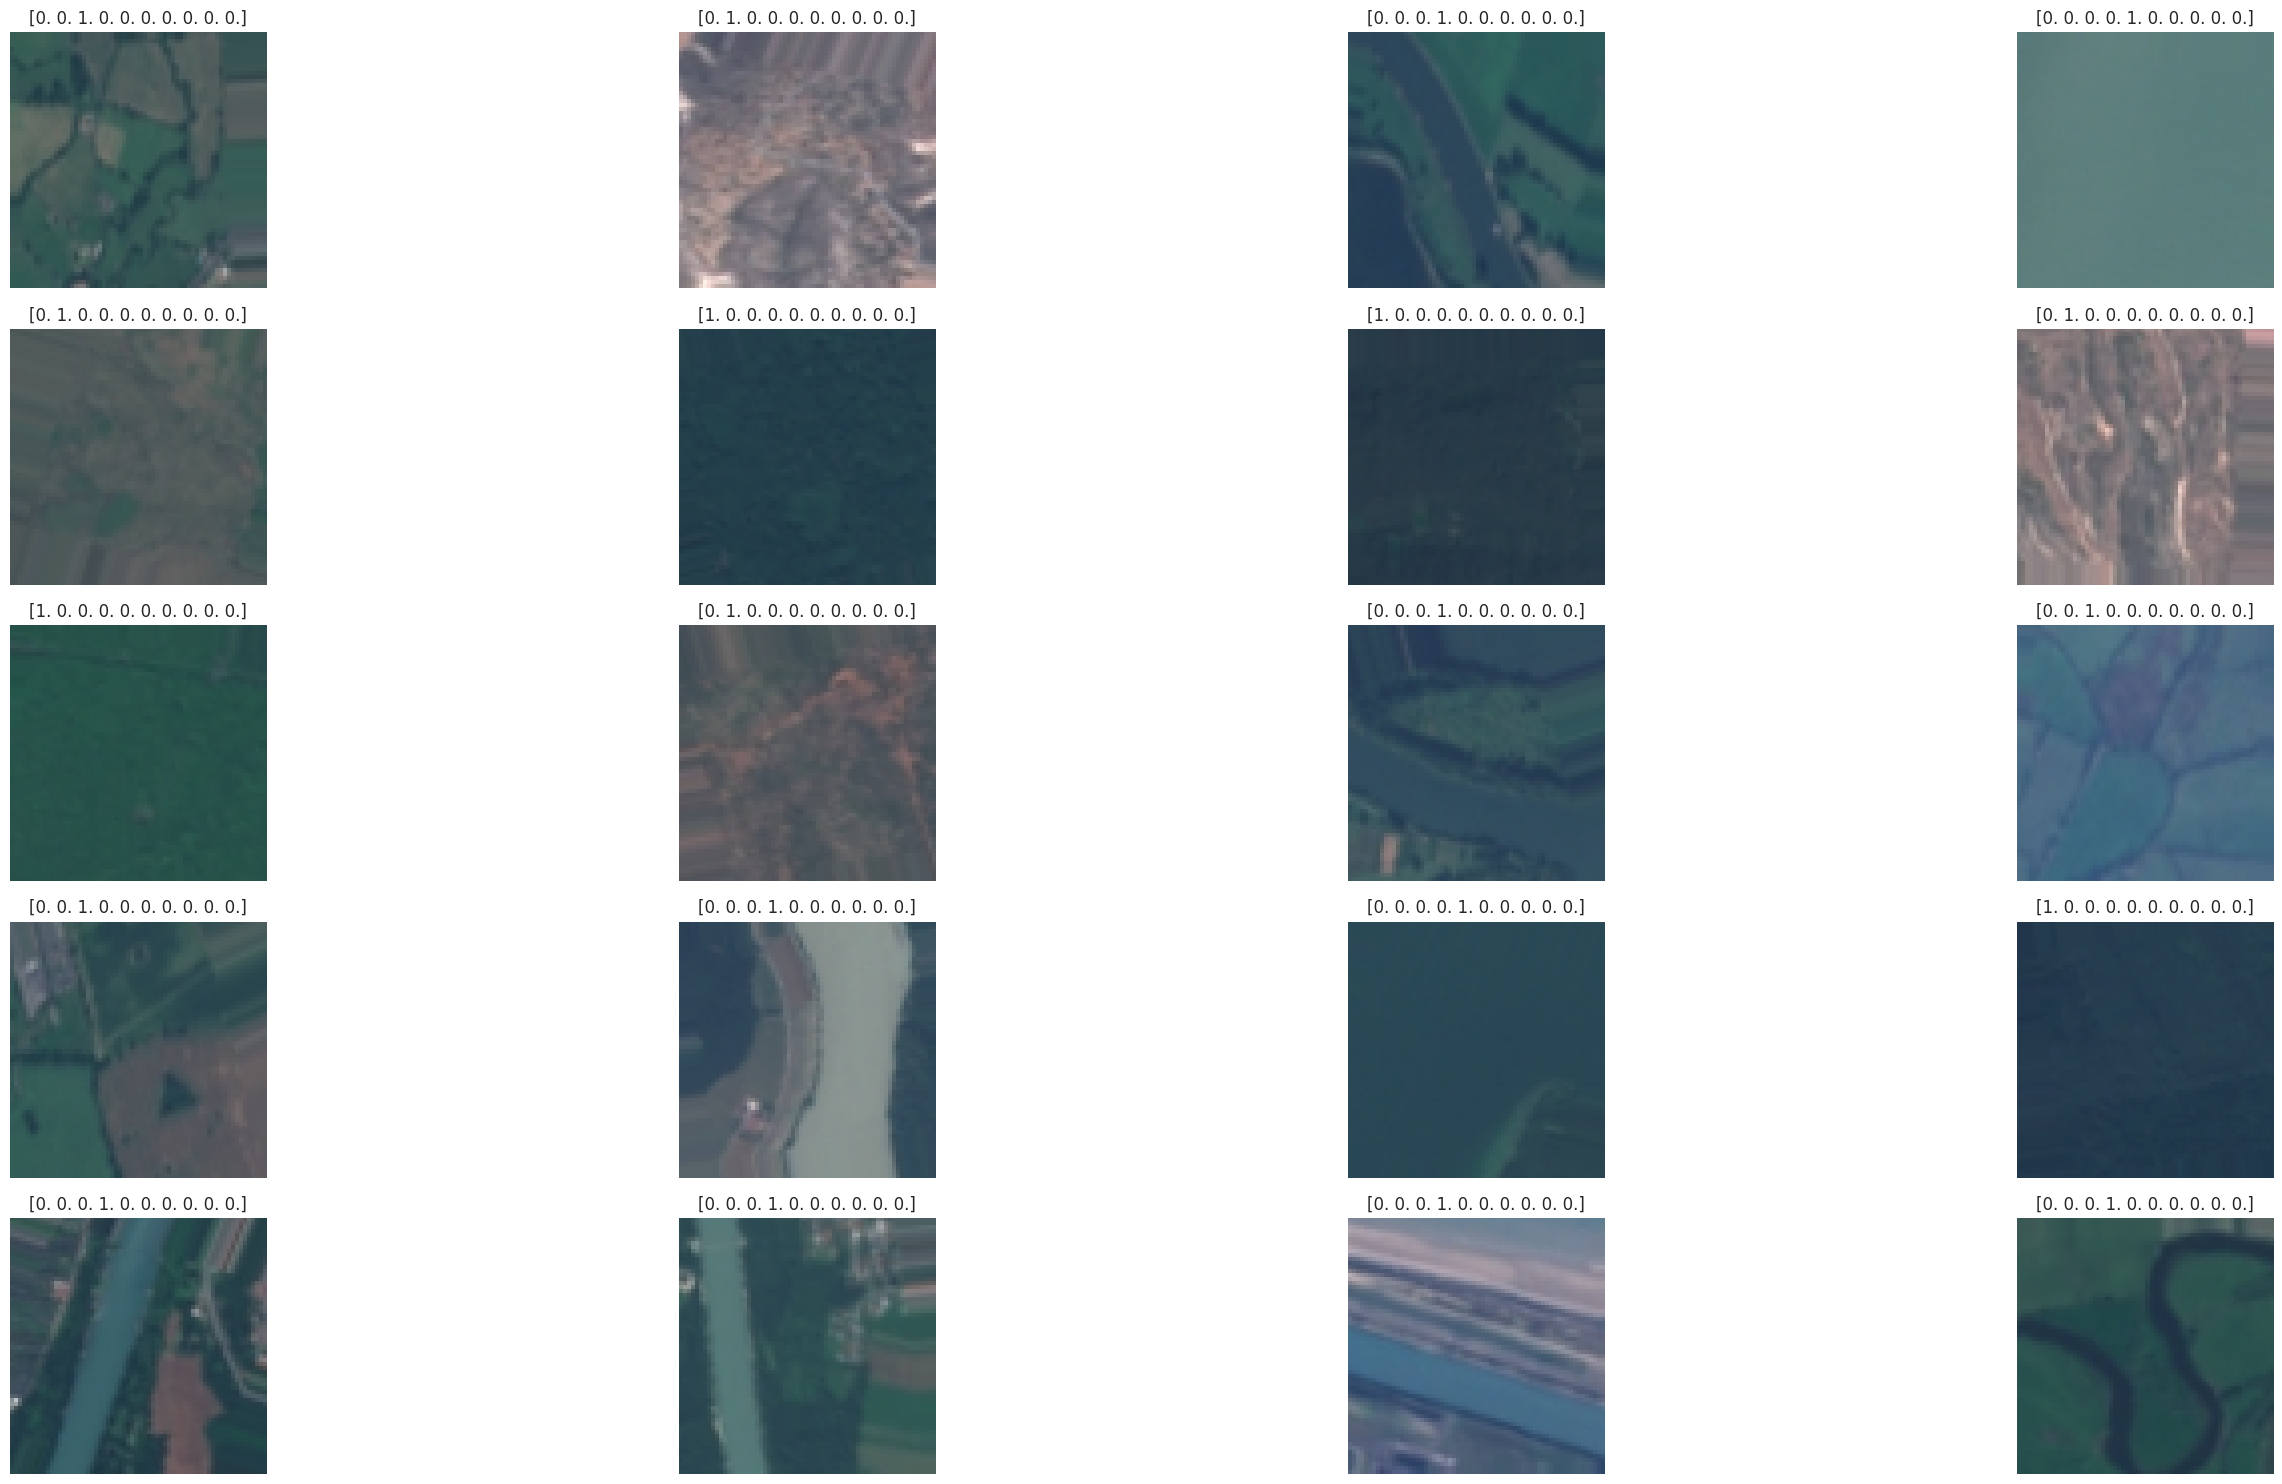

In [ ]:
imgs, labels = next(train_batches)
plots(imgs, rows=5, titles=labels)

Building anf Training CNN

In [ ]:
model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(64,64,3)), # convolutions
        Flatten(), # flatten into 1-D tensor
        Dense(10, activation='softmax') #output layer that categorizes images
])

In [ ]:
#new code
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),  # Helps prevent overfitting

    Dense(10, activation='softmax')  # Output layer (10 classes)
])


In [ ]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
%%time
# Use fit() instead of fit_generator()
model.fit(train_batches,
          steps_per_epoch=1080,
          validation_data=valid_batches,
          validation_steps=270,
          epochs=15,
          verbose=2)


Epoch 1/15
1080/1080 - 111s - 103ms/step - accuracy: 0.4083 - loss: 1.4576 - val_accuracy: 0.6419 - val_loss: 0.9896
Epoch 2/15
1080/1080 - 139s - 129ms/step - accuracy: 0.6189 - loss: 0.9934 - val_accuracy: 0.7578 - val_loss: 0.7333
Epoch 3/15
1080/1080 - 103s - 95ms/step - accuracy: 0.6962 - loss: 0.8279 - val_accuracy: 0.7858 - val_loss: 0.6058
Epoch 4/15
1080/1080 - 146s - 135ms/step - accuracy: 0.7310 - loss: 0.7450 - val_accuracy: 0.7333 - val_loss: 0.6459
Epoch 5/15
1080/1080 - 142s - 131ms/step - accuracy: 0.7598 - loss: 0.6735 - val_accuracy: 0.7722 - val_loss: 0.5716
Epoch 6/15
1080/1080 - 142s - 132ms/step - accuracy: 0.7766 - loss: 0.6385 - val_accuracy: 0.7810 - val_loss: 0.5555
Epoch 7/15
1080/1080 - 141s - 130ms/step - accuracy: 0.7934 - loss: 0.6011 - val_accuracy: 0.8179 - val_loss: 0.4847
Epoch 8/15
1080/1080 - 106s - 98ms/step - accuracy: 0.7994 - loss: 0.5681 - val_accuracy: 0.8356 - val_loss: 0.4570
Epoch 9/15
1080/1080 - 143s - 132ms/step - accuracy: 0.8137 - loss

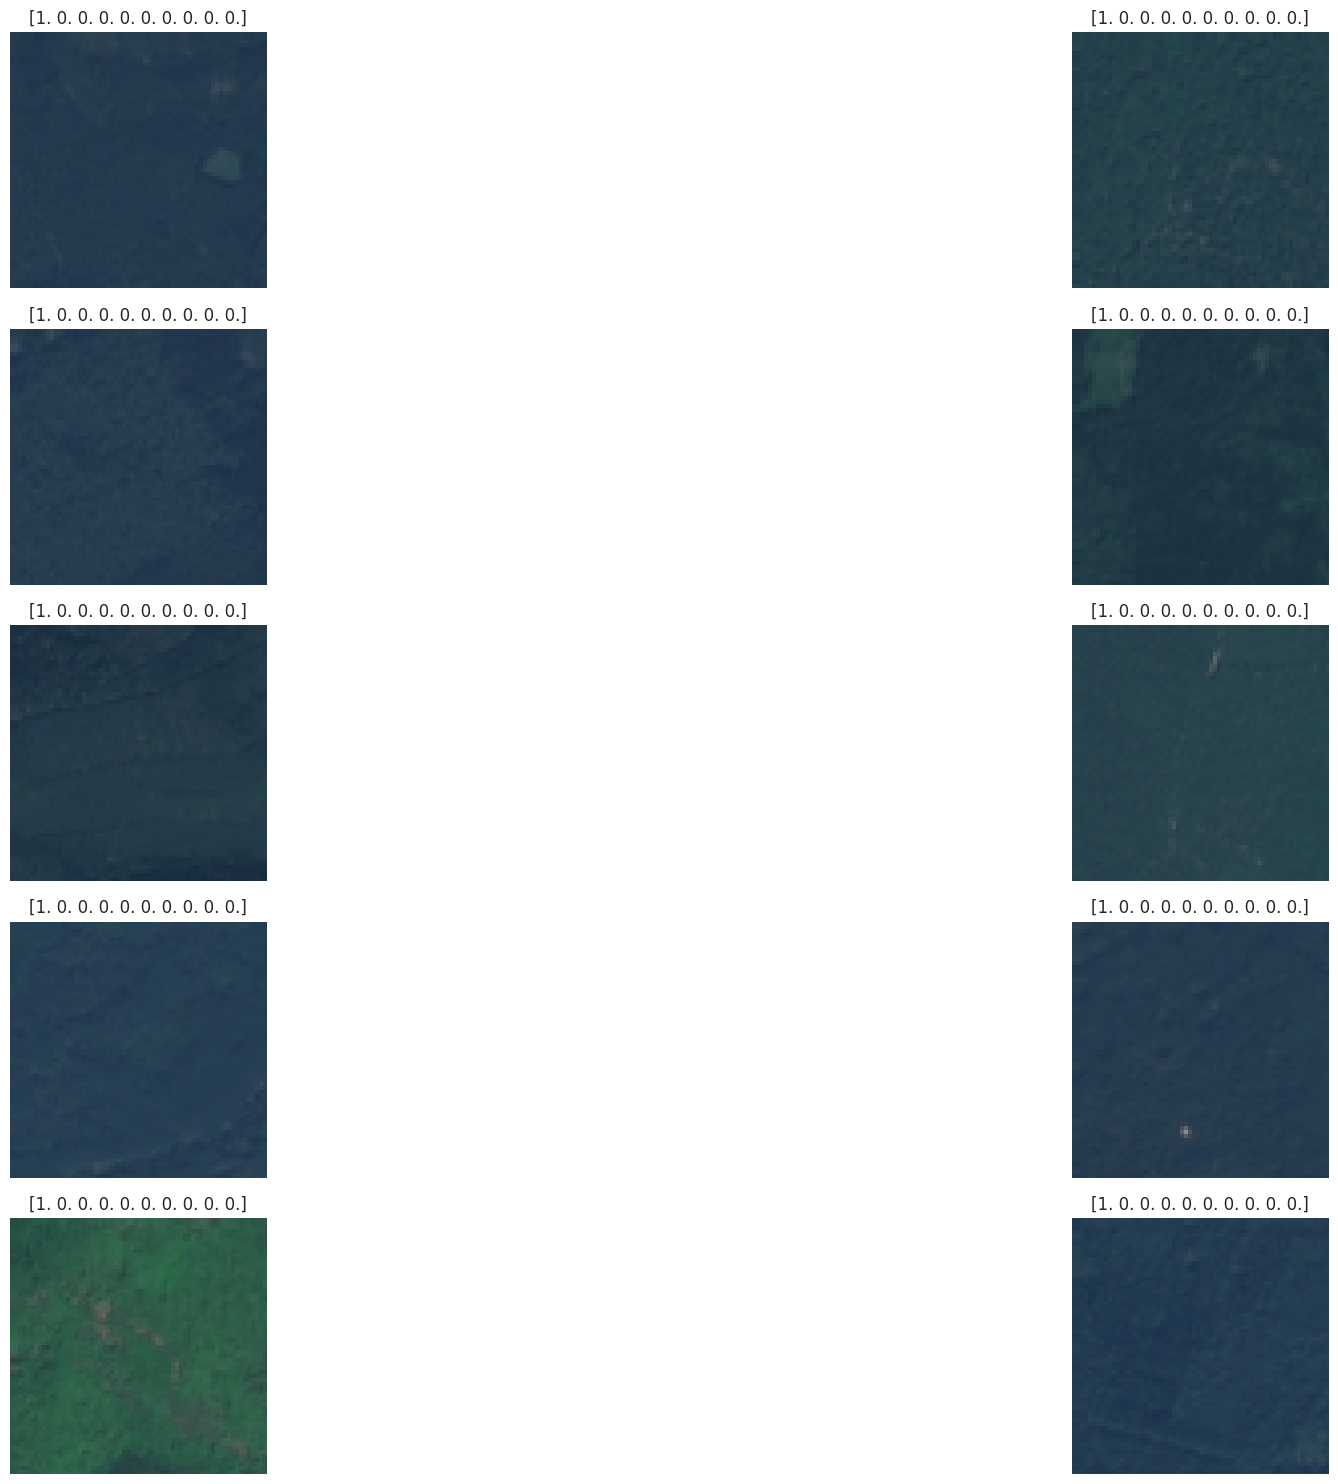

In [ ]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, rows=5, titles=test_labels)

In [ ]:
test_labels = test_batches.classes
test_labels

array([0, 0, 0, ..., 8, 8, 9], dtype=int32)

In [ ]:
# get the assigned class labels
test_batches.class_indices

{'Forest': 0,
 'HerbaceousVegetation': 1,
 'Pasture': 2,
 'River': 3,
 'SeaLake': 4,
 'beach': 5,
 'desert': 6,
 'ice': 7,
 'mountain': 8,
 'ocean': 9}

In [ ]:
predictions = model.predict(test_batches, steps=270, verbose=0)


In [ ]:
predictions[0]

array([5.8786792e-01, 4.6165916e-03, 8.8923756e-05, 1.7978800e-03,
       4.0512645e-01, 3.3636275e-06, 4.3980813e-06, 2.9372068e-06,
       6.2734011e-06, 4.8519505e-04], dtype=float32)

In [ ]:
predictions[10]

array([9.8607218e-01, 4.8004932e-08, 1.1553781e-03, 1.1486879e-02,
       1.2855268e-03, 1.4711606e-16, 1.3582758e-19, 6.1286823e-11,
       2.7607076e-18, 8.1417620e-19], dtype=float32)

In [ ]:

categories = ['Forest', 'HerbaceousVegetation', 'Pasture', 'River', 'SeaLake',
              'beach', 'desert', 'ice', 'mountain', 'ocean']

test_batches = ImageDataGenerator().flow_from_directory(
    directory='/content/CivilELdata/CivilELdata/land-use-jpeg/valid',
    target_size=(224, 224),
    classes=categories,  # ensure you pass categories in the correct order
    batch_size=10,
    shuffle=False
)


Found 1466 images belonging to 10 classes.


In [ ]:
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

In [ ]:
# modified from scikit-learn.org
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(15, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes
              )
    if normalize:
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Confusion matrix, without normalization
[[262   5  19   3  11   0   0   0   0   0]
 [  1 270   7  18   4   0   0   0   0   0]
 [  5  10 171  14   0   0   0   0   0   0]
 [  4  14  14 217   1   0   0   0   0   0]
 [  6   0   1   3 290   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0   0]
 [  0   0   0   0   0   0 114   0   0   0]
 [  0   0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   2   0]
 [  0   1   0   0   0   0   0   0   0   0]]


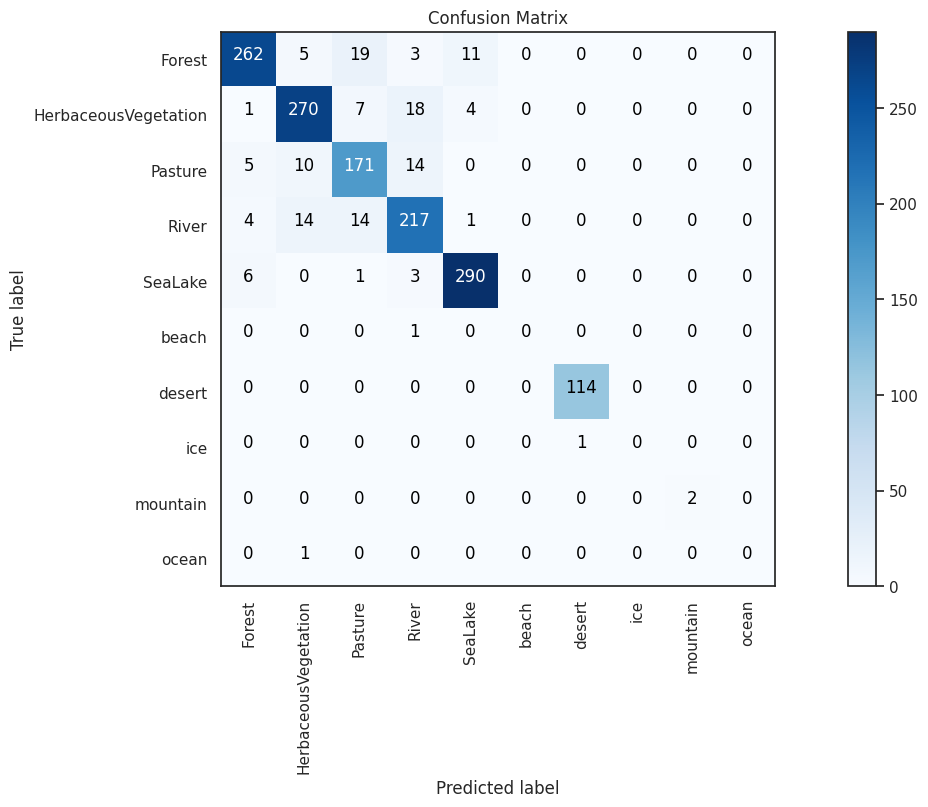

In [ ]:
plot_confusion_matrix(cm, categories, title='Confusion Matrix')

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

#Step 1: Load the model
model = load_model('habitat_classifier.h5')  # <-- change to your actual filename

# Step 2: Define class labels (in the same order as during training)
class_labels = ['Forest', 'HerbaceousVegetation', 'Pasture', 'River',
                'SeaLake', 'beach', 'desert', 'ice', 'mountain', 'ocean']

# Step 3: Load and preprocess the image (target size must be 64x64)
img_path = '/content/CivilELdata/CivilELdata/data/Pasture/Pasture_1022.jpg'  # <-- change this to your image path
img = image.load_img(img_path, target_size=(64, 64))  # Match model input shape
img_array = image.img_to_array(img) / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Shape becomes (1, 64, 64, 3)

# Step 4: Predict
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
predicted_label = class_labels[predicted_class_index]

# Step 5: Output result
print(f"The image belongs to: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
The image belongs to: Forest


In [ ]:
model.save('habitat_classifier.h5')  # saves in TensorFlow's SavedModel folder format


## Building a CNN using transfer learning

In [ ]:
import tensorflow as tf
from tensorflow import keras
vgg16_model = keras.applications.vgg16.VGG16(include_top=False, input_shape=(64,64,3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
vgg16_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# VGG16 model is type Model from the keras functional API
type(vgg16_model)

keras.src.models.functional.Functional

In [ ]:
model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

In [ ]:
# this sequential model is now the same architecture as the VGG16 model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# train a certain number of layers to learn about the type of data we're using,
# which is much different than for imagenet
NUM_TRAINABLE_LAYERS = 10
for layer in model.layers[:-NUM_TRAINABLE_LAYERS]:
    layer.trainable = False #excludes layer from future training so weights will not be updated when we train the mode

In [ ]:
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(len(categories), activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,031,562 (61.16 MB)

 Trainable params: 14,886,154 (56.79 MB)

 Non-trainable params: 1,145,408 (4.37 MB)

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
%%time
history = model.fit(train_batches,
                    steps_per_epoch=1080,
                    validation_data=valid_batches,
                    validation_steps=270,
                    epochs=10,
                    verbose=2)
